# Pion Distribution Plotter

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#import libraries and some constants

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm
import scipy
import pandas as pd
import uproot as ur
import atlas_mpl_style as ampl

ampl.use_atlas_style()
params = {'legend.fontsize': 13,
          'axes.labelsize': 18}
plt.rcParams.update(params)

path_prefix = '/AL/Phd/maxml/'
plotpath = path_prefix+'plotter/Plots/'
modelpath = path_prefix+'caloml-atlas/classifier/Models/'
# %config InlineBackend.figure_format = 'svg'

# metadata
layers = ["EMB1", "EMB2", "EMB3", "TileBar0", "TileBar1", "TileBar2"]
cell_size_phi = [0.098, 0.0245, 0.0245, 0.1, 0.1, 0.1]
cell_size_eta = [0.0031, 0.025, 0.05, 0.1, 0.1, 0.2]
len_phi = [4, 16, 16, 4, 4, 4]
len_eta = [128, 16, 8, 4, 4, 2]

In [3]:
# fancy display names for each pion type
pi_latex = {
    'pi0': '\(\pi^{0}\)',
    'piplus': '\(\pi^{+}\)',
    'piminus': '\(\pi^{-}\)',
}

In [4]:
# import our resolution utilities

import sys
sys.path.append(path_prefix+'caloml-atlas/')
sys.path
from  util import resolution_util as ru
from  util import plot_util as pu
from  util import ml_util as mu

Using TensorFlow backend.


In [5]:
# import pi+- vs. pi0 images

inputpath = path_prefix+'caloml-atlas/inputs/'
branches = ['runNumber', 'eventNumber', 'truthE', 'truthPt', 'truthEta', 'truthPhi', 'clusterIndex', 'nCluster', 'clusterE', 'clusterECalib', 'clusterPt', 'clusterEta', 'clusterPhi', 'cluster_nCells', 'cluster_sumCellE', 'cluster_ENG_CALIB_TOT', 'cluster_ENG_CALIB_OUT_T', 'cluster_ENG_CALIB_DEAD_TOT', 'cluster_EM_PROBABILITY', 'cluster_HAD_WEIGHT', 'cluster_OOC_WEIGHT', 'cluster_DM_WEIGHT', 'cluster_CENTER_MAG', 'cluster_FIRST_ENG_DENS', 'cluster_cell_dR_min', 'cluster_cell_dR_max', 'cluster_cell_dEta_min', 'cluster_cell_dEta_max', 'cluster_cell_dPhi_min', 'cluster_cell_dPhi_max', 'cluster_cell_centerCellEta', 'cluster_cell_centerCellPhi', 'cluster_cell_centerCellLayer', 'cluster_cellE_norm']
rootfiles = ["pi0", "piplus", "piminus"]
trees = {
    rfile : ur.open(inputpath+rfile+'.root')['ClusterTree']
    for rfile in rootfiles
}
pdata = {
    ifile : itree.pandas.df(branches, flatten=False)
    for ifile, itree in trees.items()
}

np0 = len(pdata['pi0'])
npp = len(pdata['piplus'])
npm = len(pdata['piminus'])

print("Number of pi0 events: {}".format(np0))
print("Number of pi+ events: {}".format(npp))
print("Number of pi- events: {}".format(npm))
print("Total: {}".format(np0+npp+npm))

Number of pi0 events: 263891
Number of pi+ events: 435967
Number of pi- events: 434627
Total: 1134485


In [6]:
# pandas does not handle vectors in root files properly,
# so they need to be imported differently

cell_shapes = {
    'EMB1': (128,4),
    'EMB2': (16,16),
    'EMB3': (8,16),
    'TileBar0': (4,4),
    'TileBar1': (4,4),
    'TileBar2': (2,4),
}

pcells = {
    ifile : {
        layer : mu.setupCells(itree, layer)
        for layer in layers
    }
    for ifile, itree in trees.items()
}

In [11]:
# renormalise energy fractions to be per layer rather than per cluster
pcells_normed = pcells.copy()

for ptype, pcell in pcells_normed.items():
    for layer in layers:
        norms = pcell[layer].sum(axis=1)
        for i, norm in enumerate(norms):
            if( norm != 0 ):
                pcell[layer][i] = pcell[layer][i] / norm

In [12]:
energy_bins = [0, 1, 5, 20, 100, 500]
layer_average = {}

<Figure size 576x432 with 0 Axes>

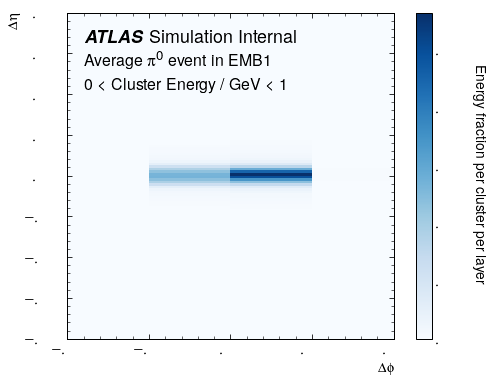

<Figure size 576x432 with 0 Axes>

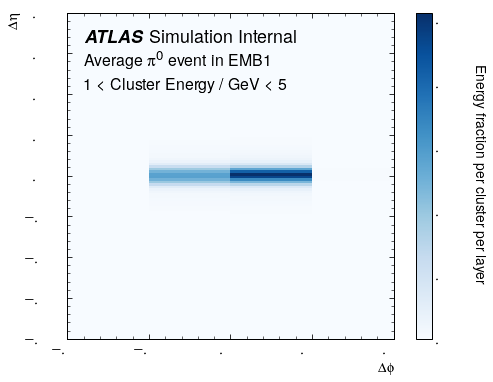

<Figure size 576x432 with 0 Axes>

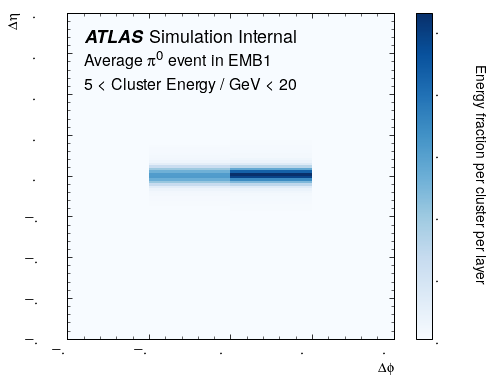

<Figure size 576x432 with 0 Axes>

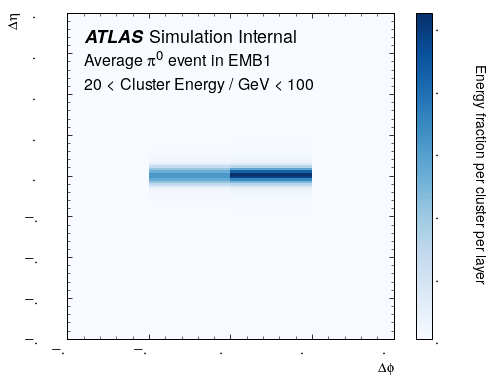

<Figure size 576x432 with 0 Axes>

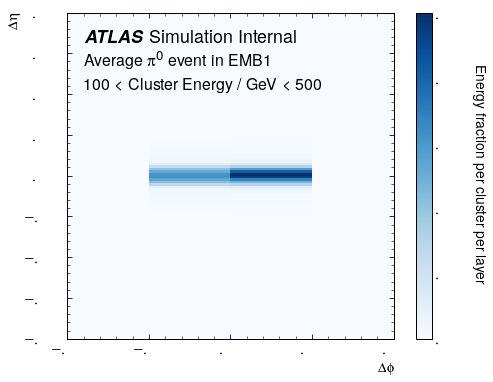

<Figure size 576x432 with 0 Axes>

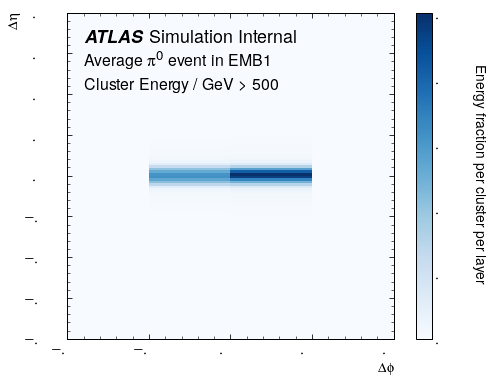

<Figure size 576x432 with 0 Axes>

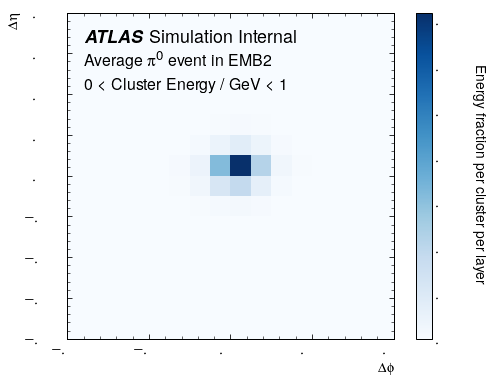

<Figure size 576x432 with 0 Axes>

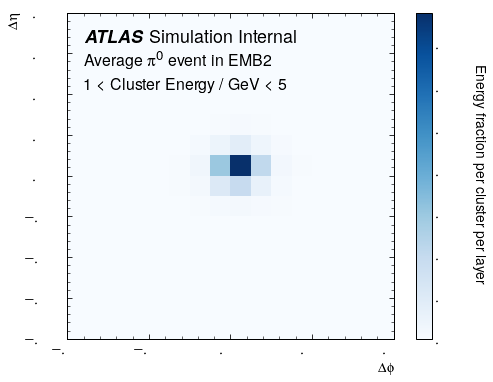

<Figure size 576x432 with 0 Axes>

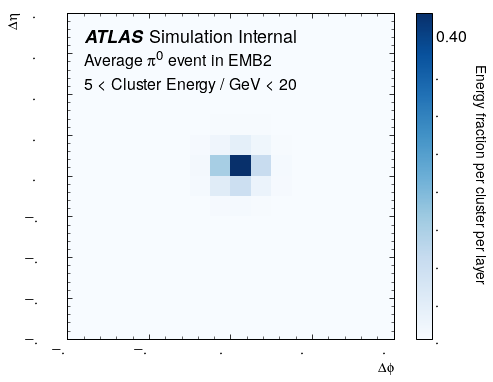

<Figure size 576x432 with 0 Axes>

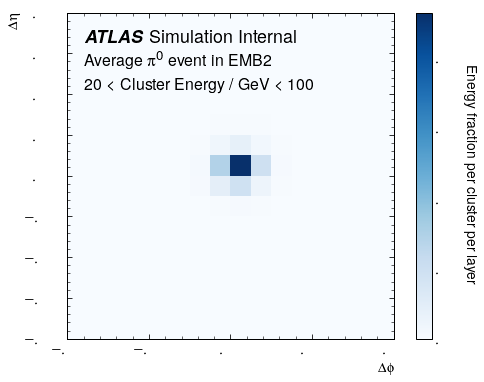

<Figure size 576x432 with 0 Axes>

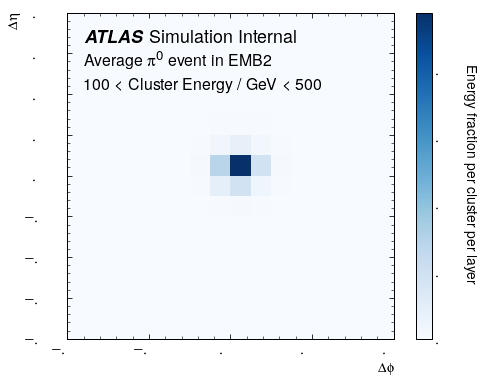

<Figure size 576x432 with 0 Axes>

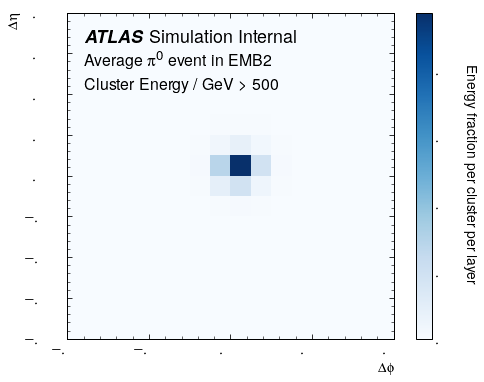

<Figure size 576x432 with 0 Axes>

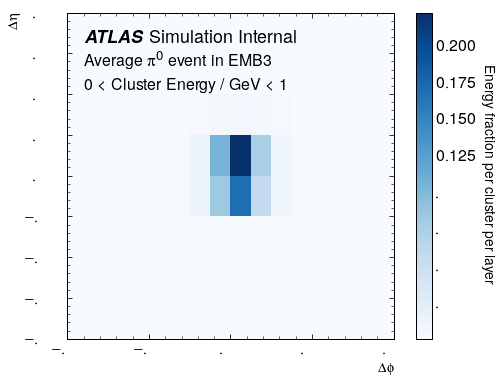

<Figure size 576x432 with 0 Axes>

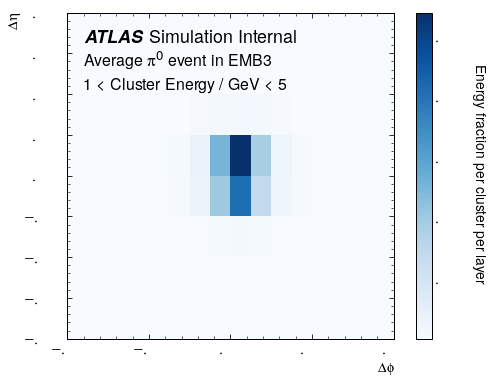

<Figure size 576x432 with 0 Axes>

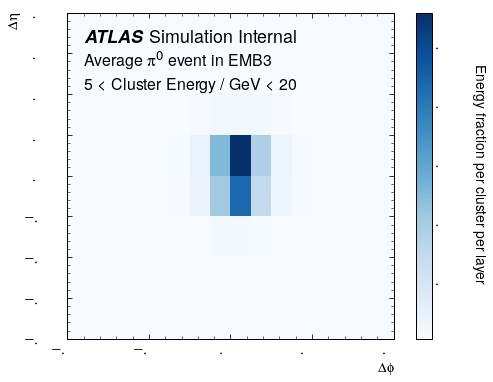

<Figure size 576x432 with 0 Axes>

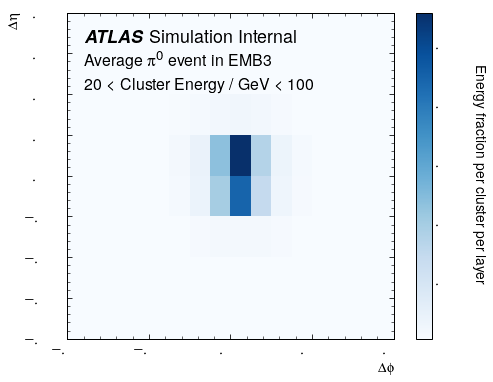

<Figure size 576x432 with 0 Axes>

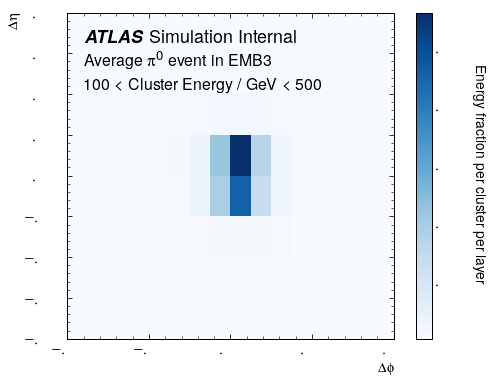

<Figure size 576x432 with 0 Axes>

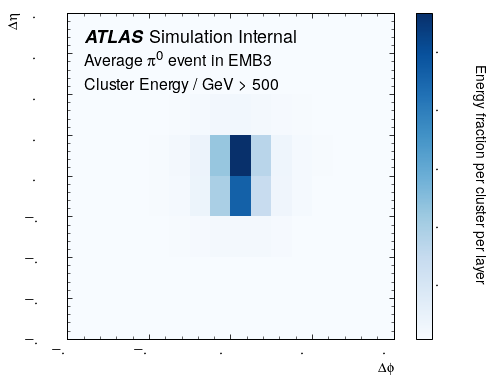

<Figure size 576x432 with 0 Axes>

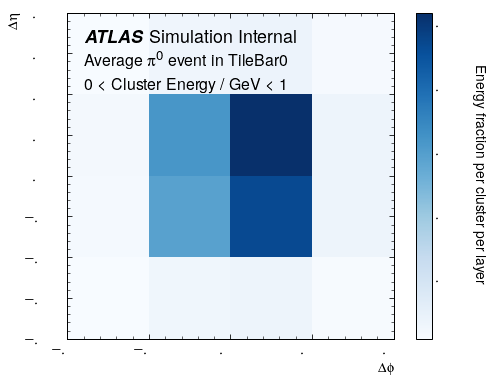

<Figure size 576x432 with 0 Axes>

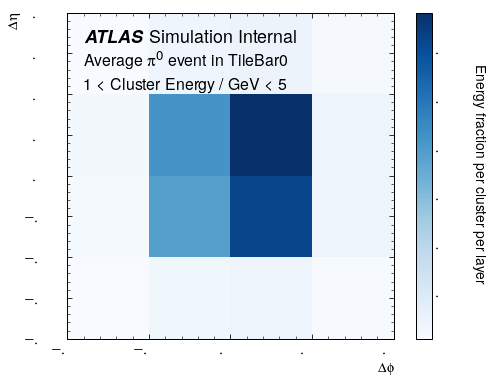

<Figure size 576x432 with 0 Axes>

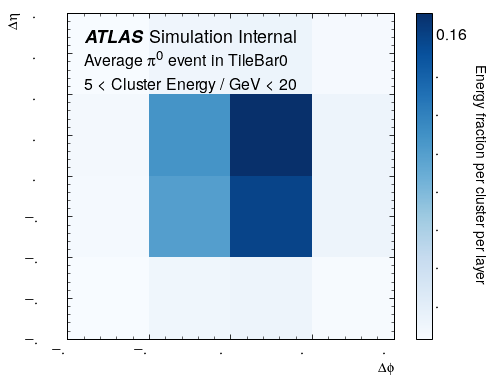

<Figure size 576x432 with 0 Axes>

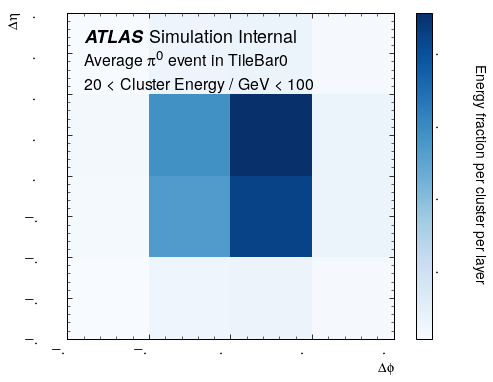

<Figure size 576x432 with 0 Axes>

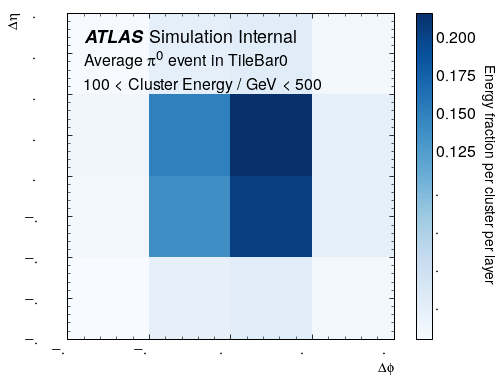

<Figure size 576x432 with 0 Axes>

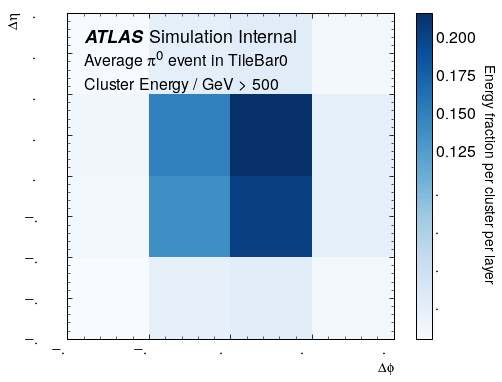

<Figure size 576x432 with 0 Axes>

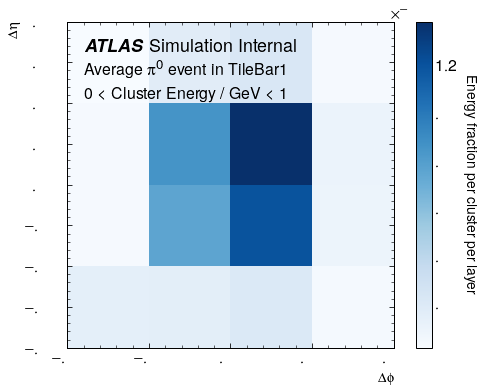

<Figure size 576x432 with 0 Axes>

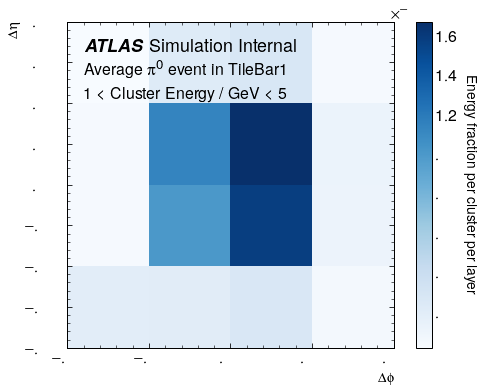

<Figure size 576x432 with 0 Axes>

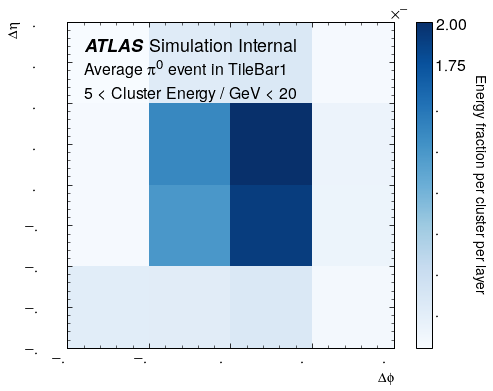

<Figure size 576x432 with 0 Axes>

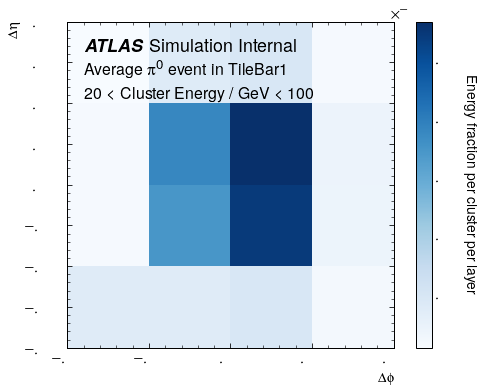

<Figure size 576x432 with 0 Axes>

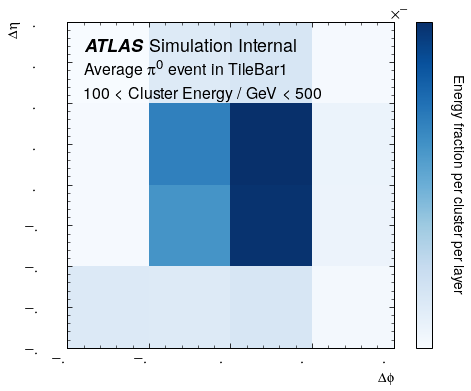

<Figure size 576x432 with 0 Axes>

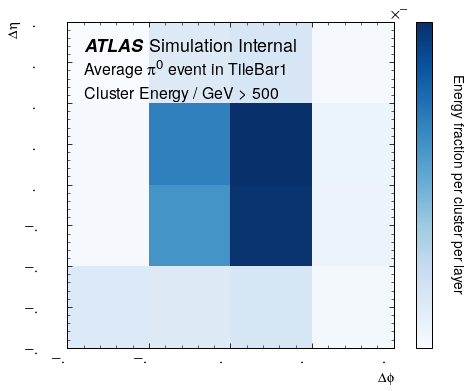

<Figure size 576x432 with 0 Axes>

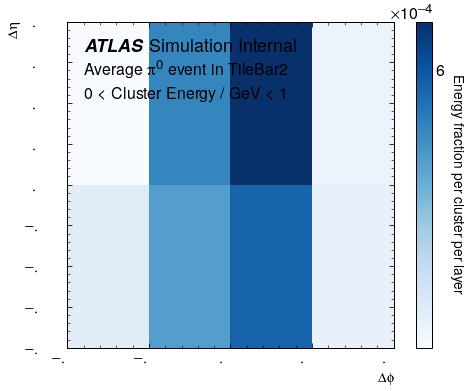

<Figure size 576x432 with 0 Axes>

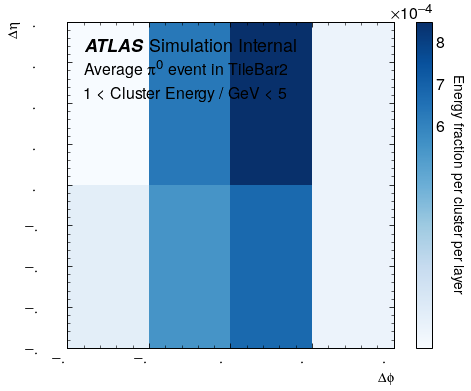

<Figure size 576x432 with 0 Axes>

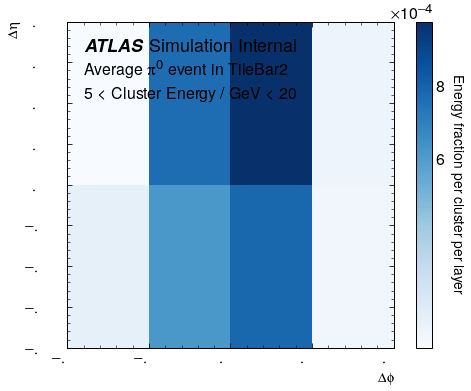

<Figure size 576x432 with 0 Axes>

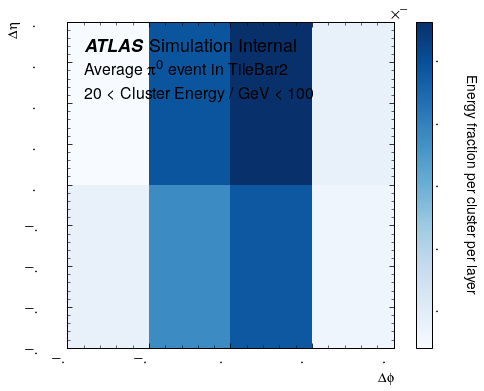

<Figure size 576x432 with 0 Axes>

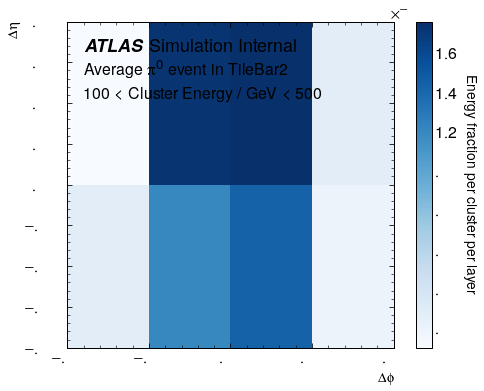

<Figure size 576x432 with 0 Axes>

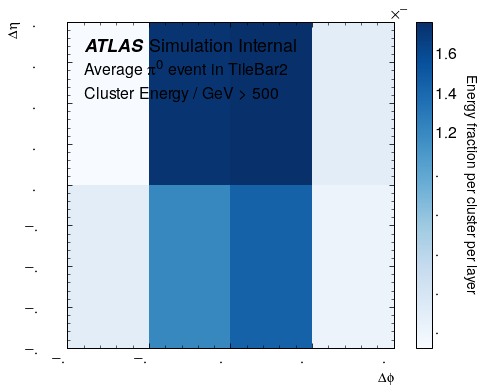

<Figure size 576x432 with 0 Axes>

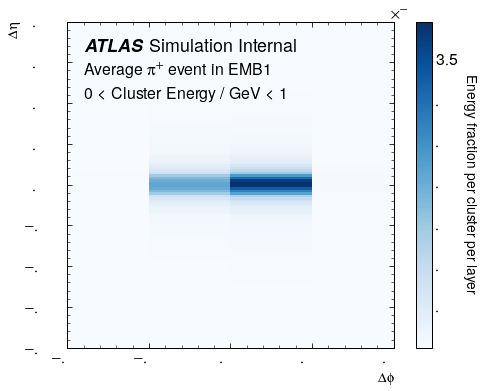

<Figure size 576x432 with 0 Axes>

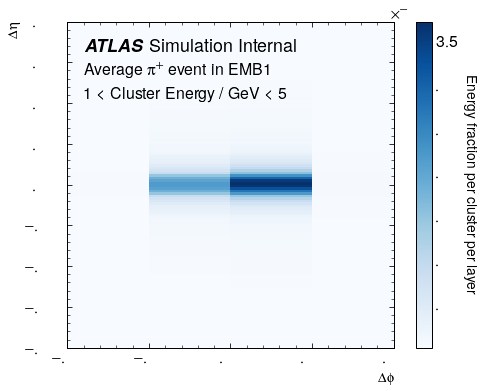

<Figure size 576x432 with 0 Axes>

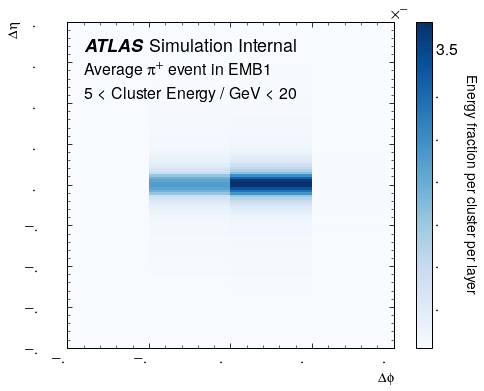

<Figure size 576x432 with 0 Axes>

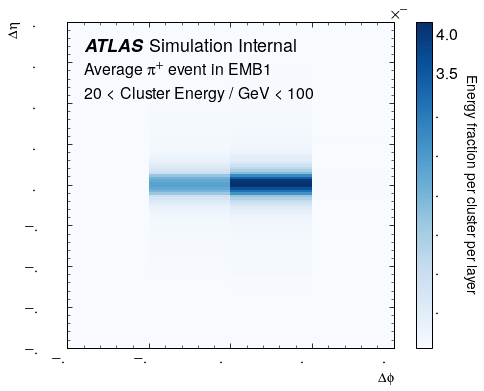

<Figure size 576x432 with 0 Axes>

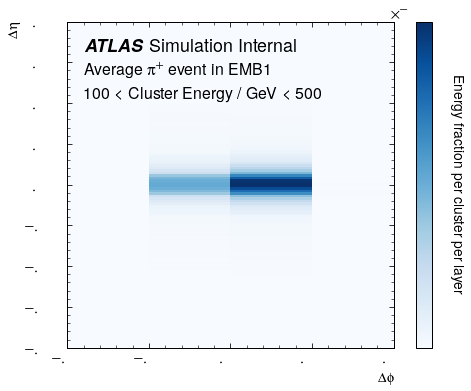

<Figure size 576x432 with 0 Axes>

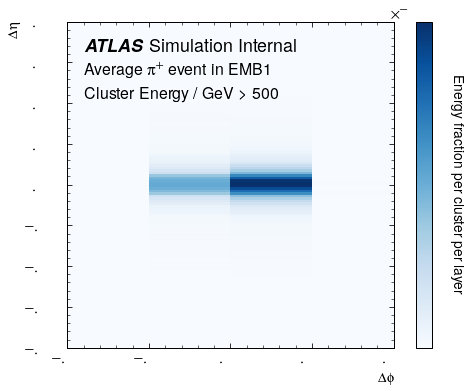

<Figure size 576x432 with 0 Axes>

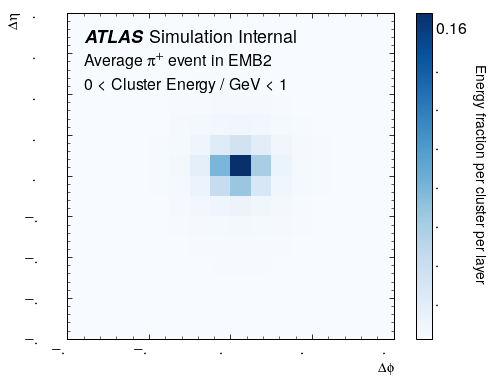

<Figure size 576x432 with 0 Axes>

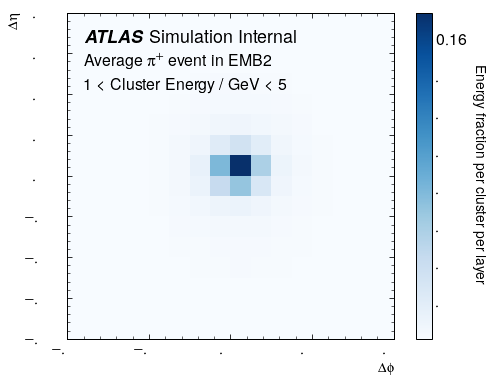

<Figure size 576x432 with 0 Axes>

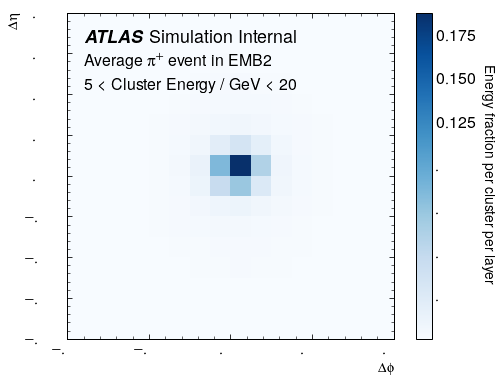

<Figure size 576x432 with 0 Axes>

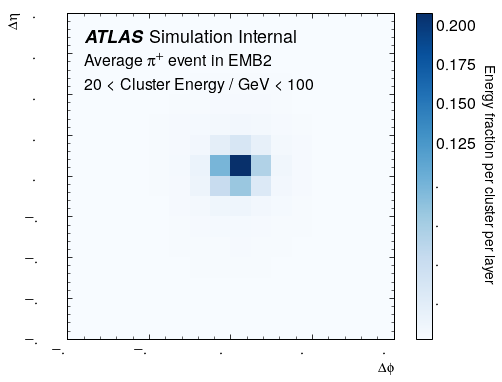

<Figure size 576x432 with 0 Axes>

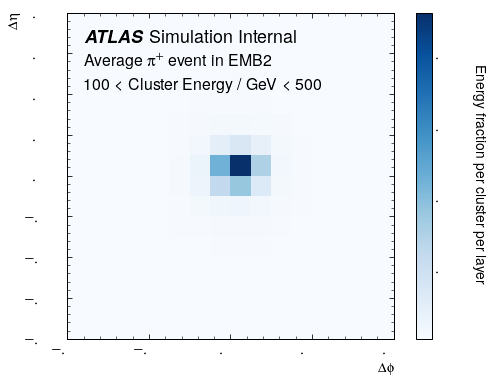

<Figure size 576x432 with 0 Axes>

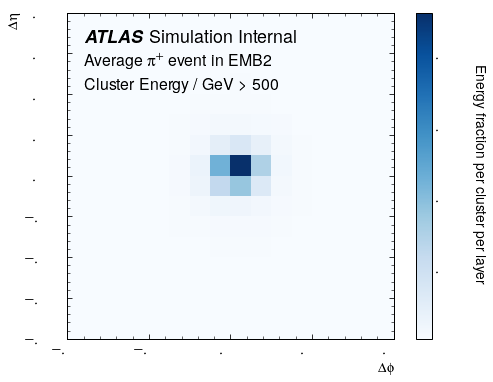

<Figure size 576x432 with 0 Axes>

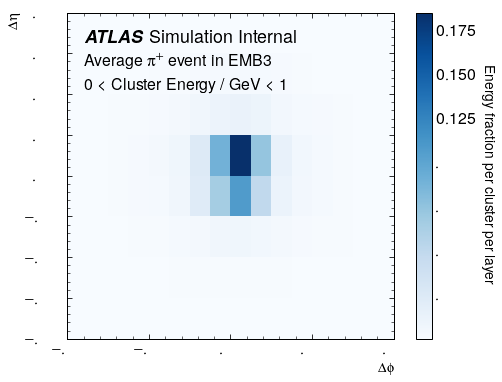

<Figure size 576x432 with 0 Axes>

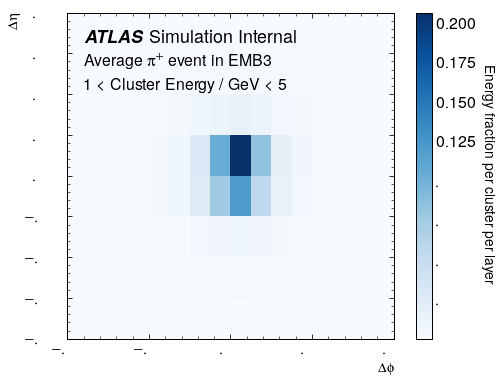

<Figure size 576x432 with 0 Axes>

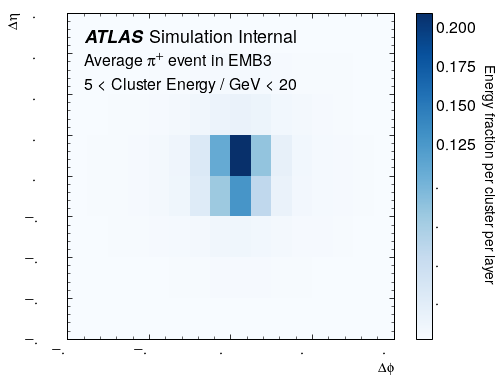

<Figure size 576x432 with 0 Axes>

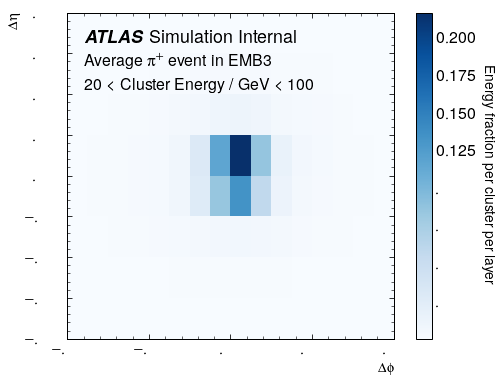

<Figure size 576x432 with 0 Axes>

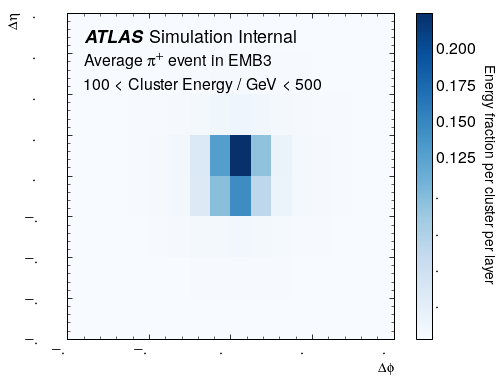

<Figure size 576x432 with 0 Axes>

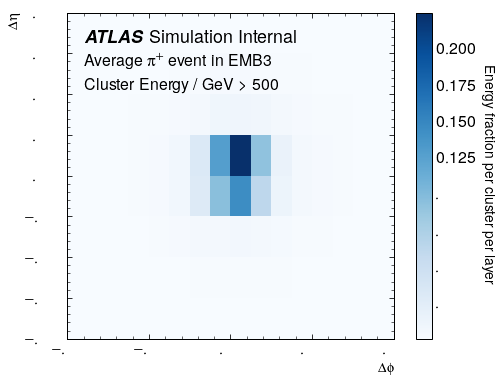

<Figure size 576x432 with 0 Axes>

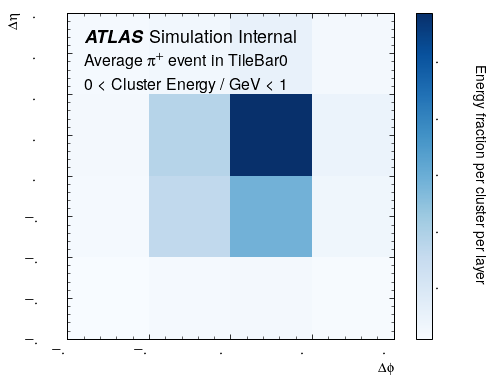

<Figure size 576x432 with 0 Axes>

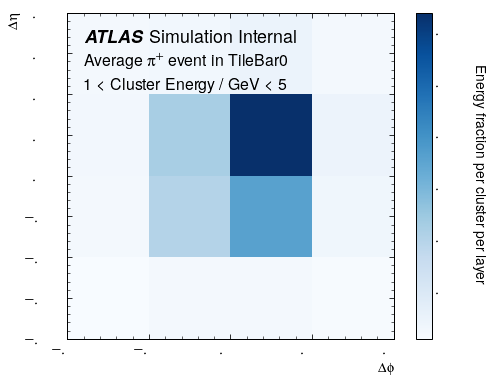

<Figure size 576x432 with 0 Axes>

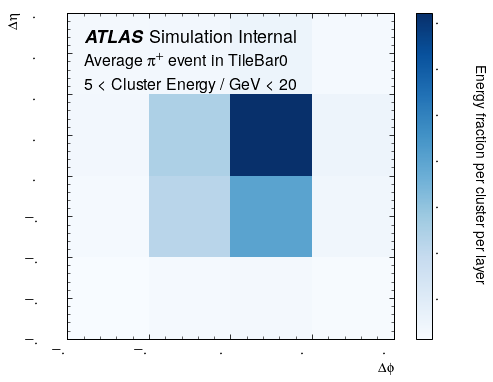

<Figure size 576x432 with 0 Axes>

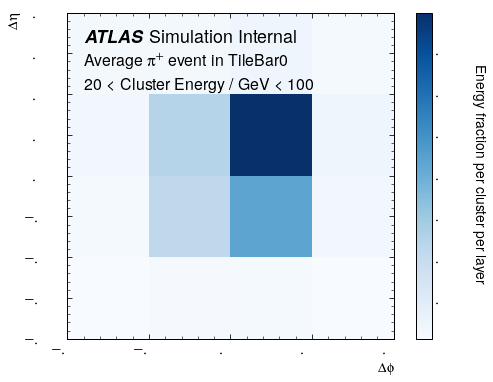

<Figure size 576x432 with 0 Axes>

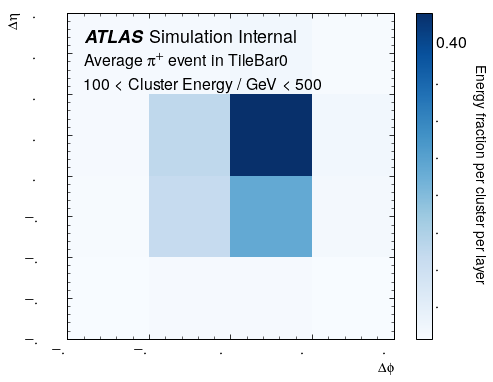

<Figure size 576x432 with 0 Axes>

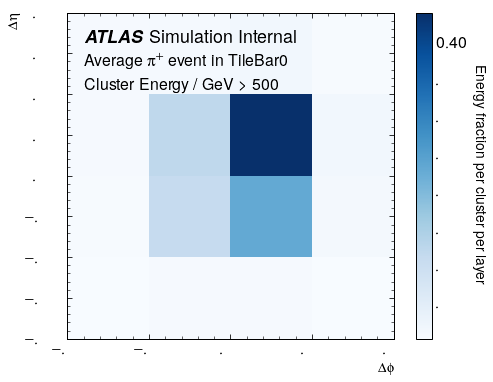

<Figure size 576x432 with 0 Axes>

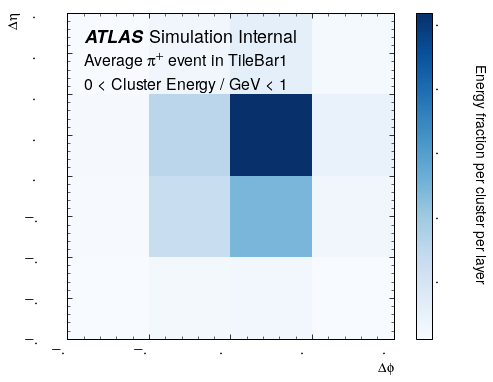

<Figure size 576x432 with 0 Axes>

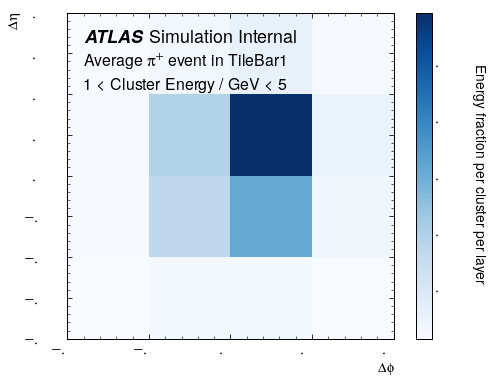

<Figure size 576x432 with 0 Axes>

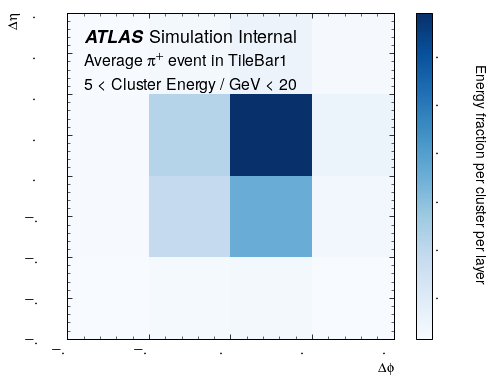

<Figure size 576x432 with 0 Axes>

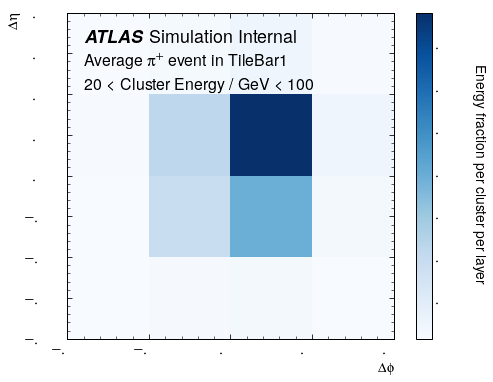

<Figure size 576x432 with 0 Axes>

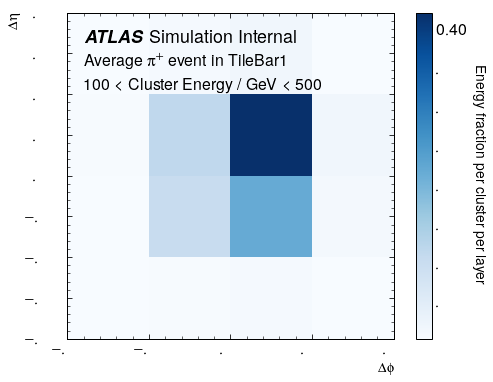

<Figure size 576x432 with 0 Axes>

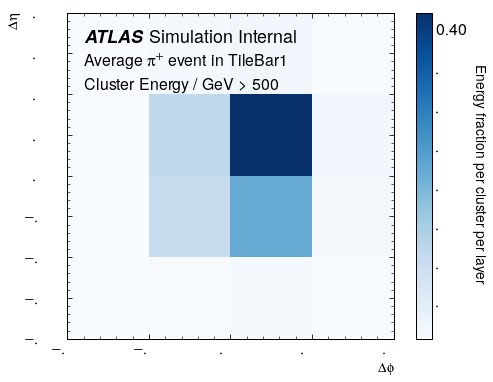

<Figure size 576x432 with 0 Axes>

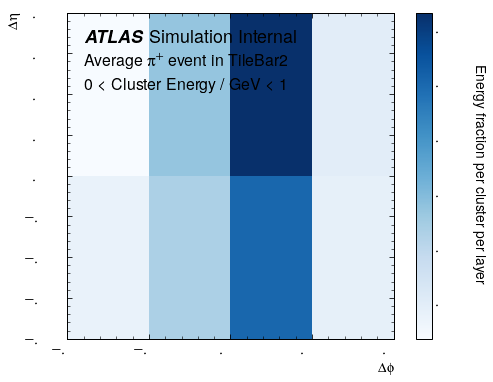

<Figure size 576x432 with 0 Axes>

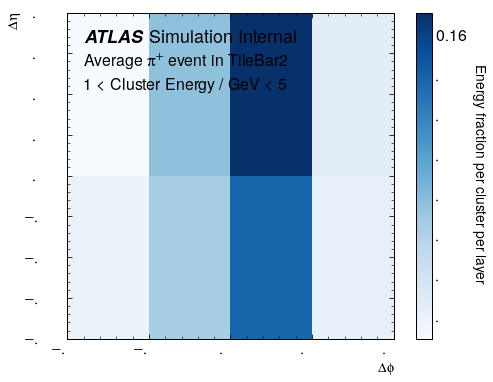

<Figure size 576x432 with 0 Axes>

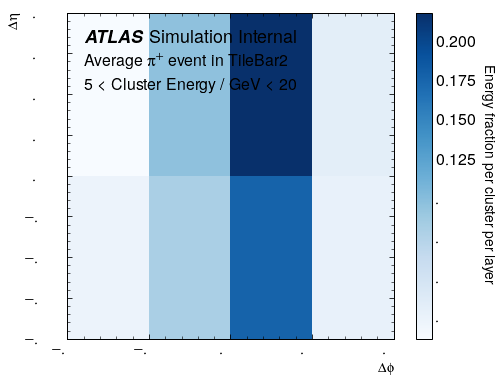

<Figure size 576x432 with 0 Axes>

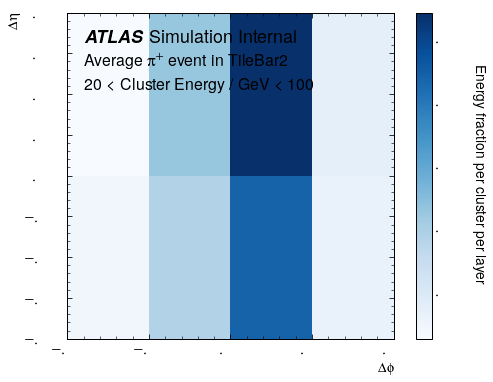

<Figure size 576x432 with 0 Axes>

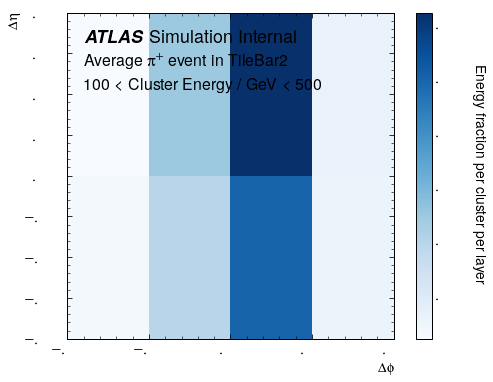

<Figure size 576x432 with 0 Axes>

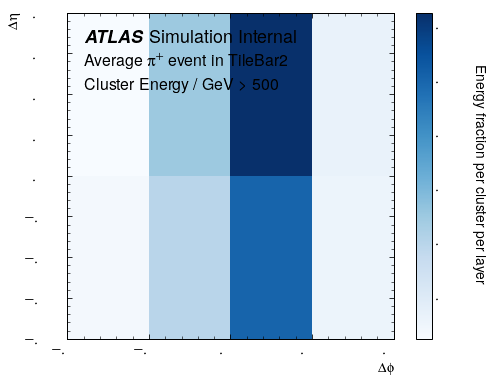

<Figure size 576x432 with 0 Axes>

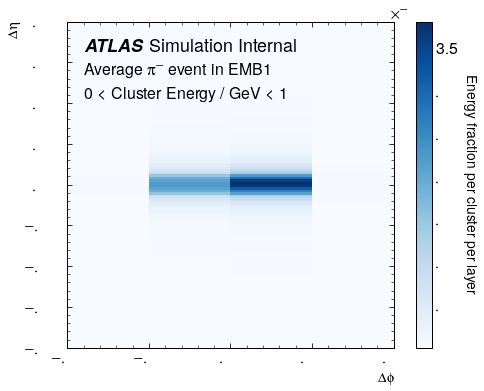

<Figure size 576x432 with 0 Axes>

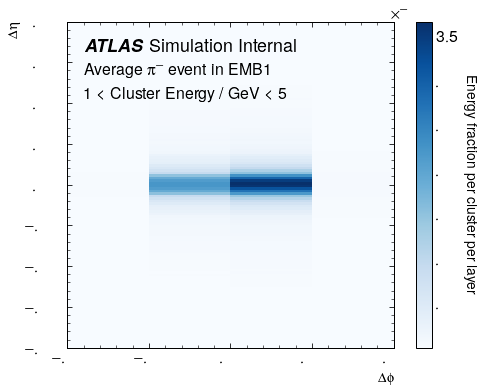

<Figure size 576x432 with 0 Axes>

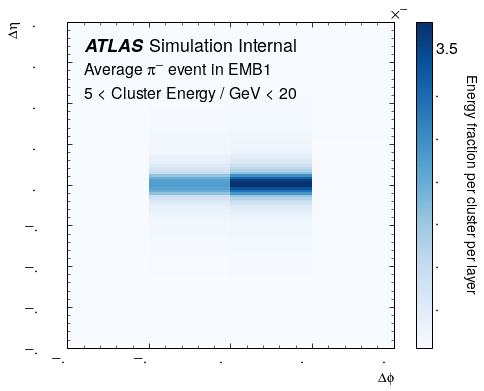

<Figure size 576x432 with 0 Axes>

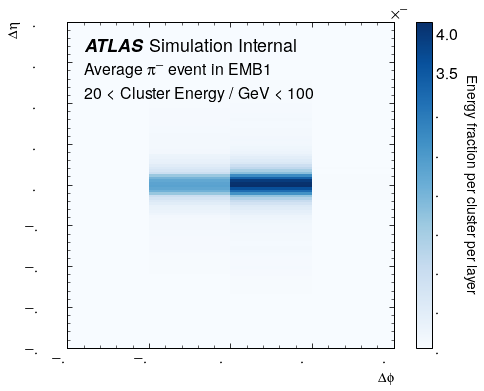

<Figure size 576x432 with 0 Axes>

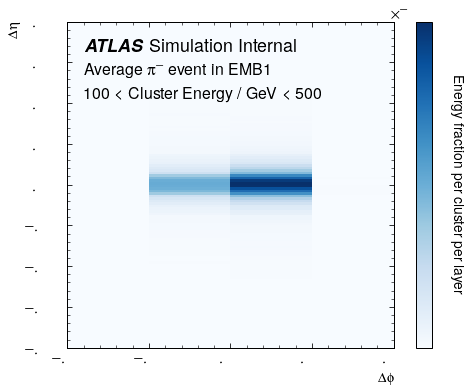

<Figure size 576x432 with 0 Axes>

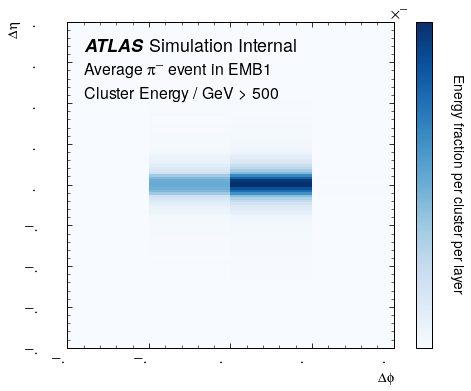

<Figure size 576x432 with 0 Axes>

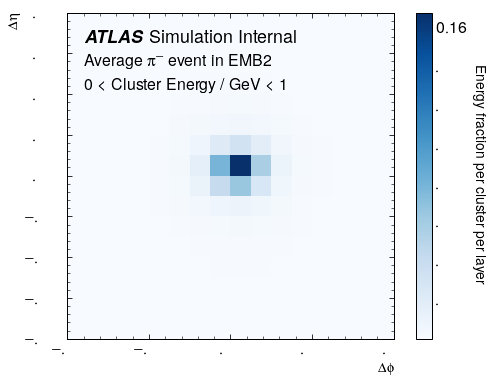

<Figure size 576x432 with 0 Axes>

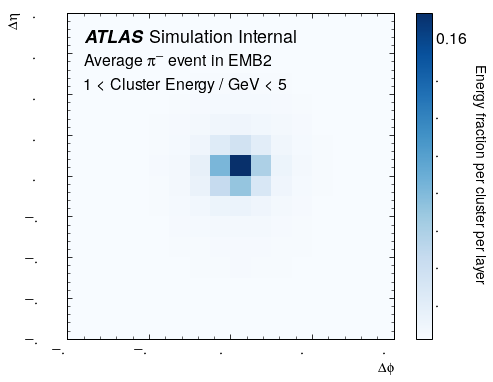

<Figure size 576x432 with 0 Axes>

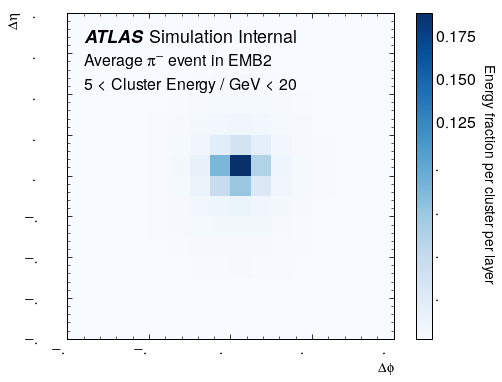

<Figure size 576x432 with 0 Axes>

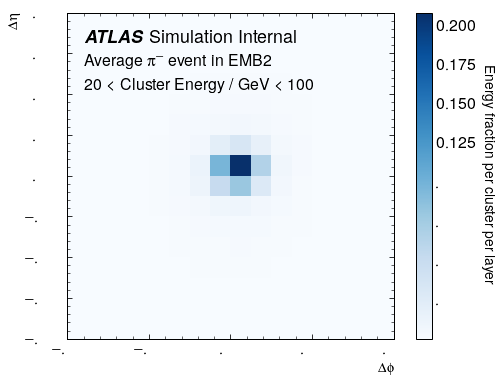

<Figure size 576x432 with 0 Axes>

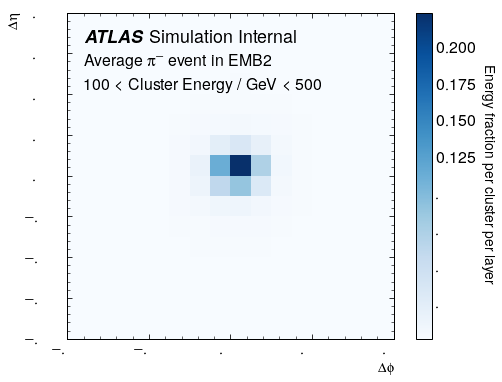

<Figure size 576x432 with 0 Axes>

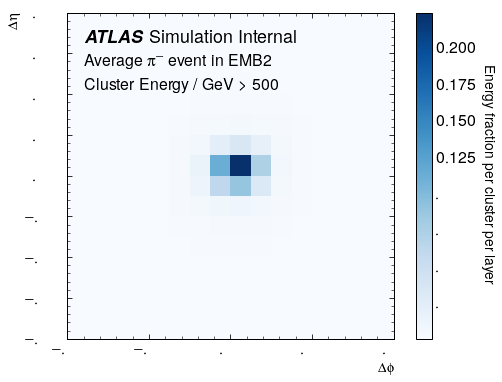

<Figure size 576x432 with 0 Axes>

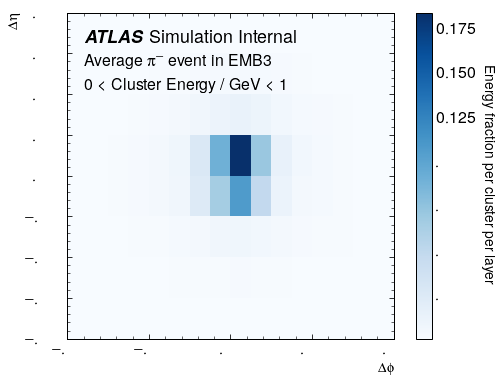

<Figure size 576x432 with 0 Axes>

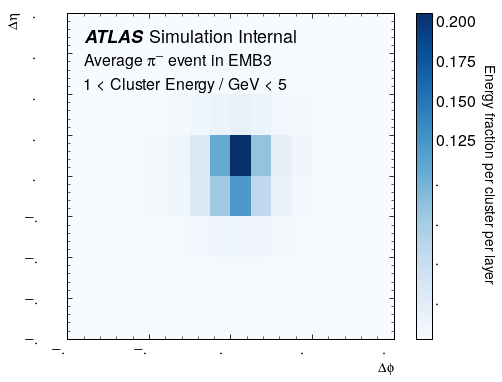

<Figure size 576x432 with 0 Axes>

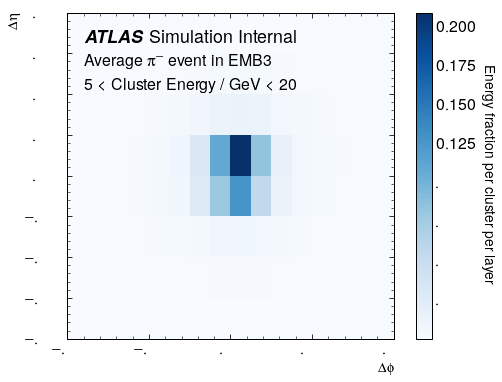

<Figure size 576x432 with 0 Axes>

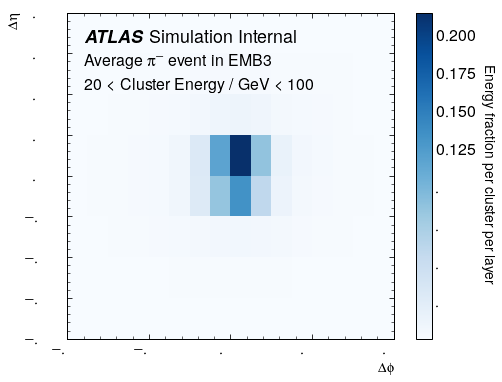

<Figure size 576x432 with 0 Axes>

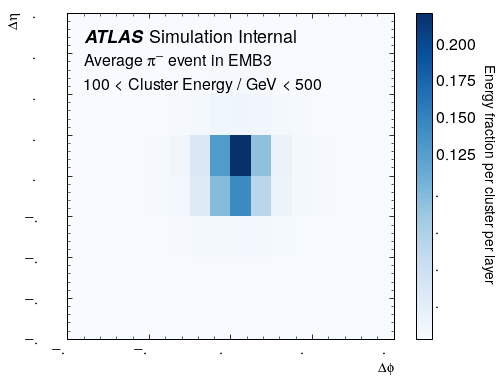

<Figure size 576x432 with 0 Axes>

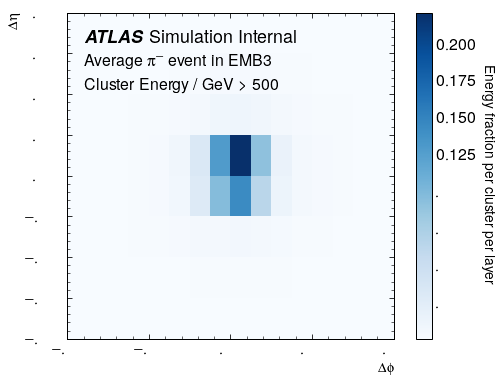

<Figure size 576x432 with 0 Axes>

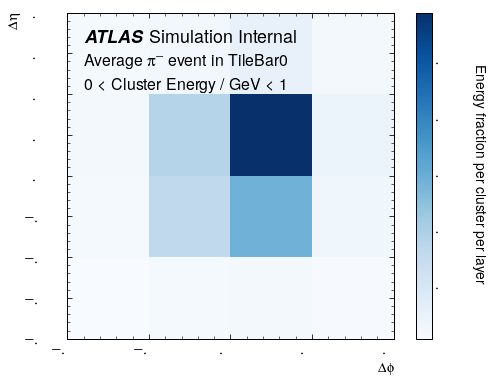

<Figure size 576x432 with 0 Axes>

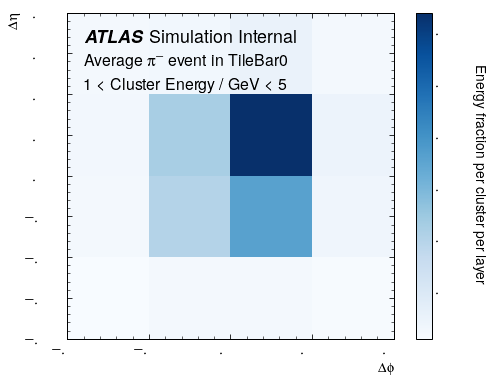

<Figure size 576x432 with 0 Axes>

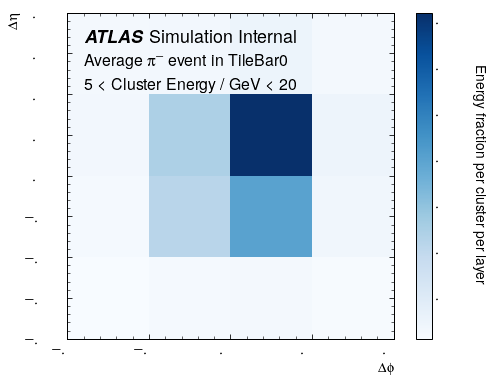

<Figure size 576x432 with 0 Axes>

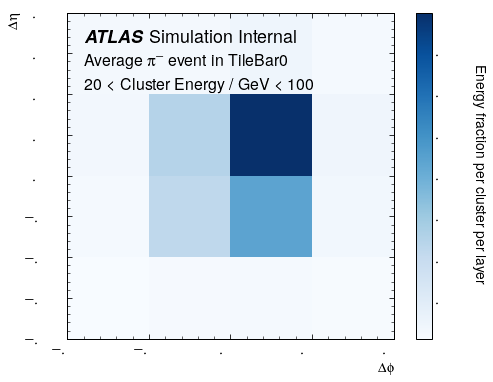

<Figure size 576x432 with 0 Axes>

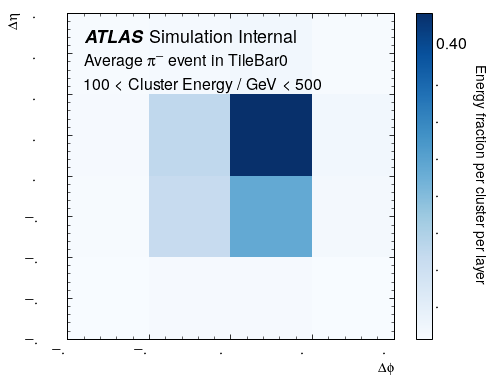

<Figure size 576x432 with 0 Axes>

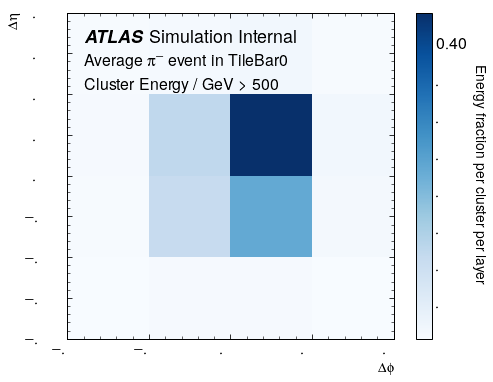

<Figure size 576x432 with 0 Axes>

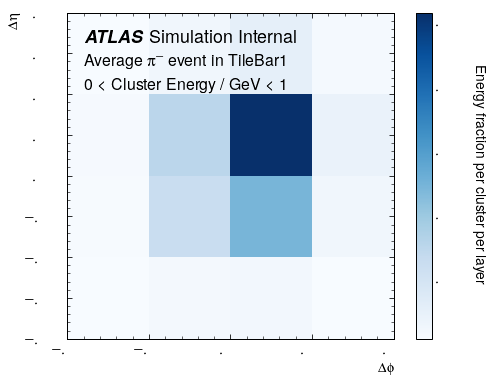

<Figure size 576x432 with 0 Axes>

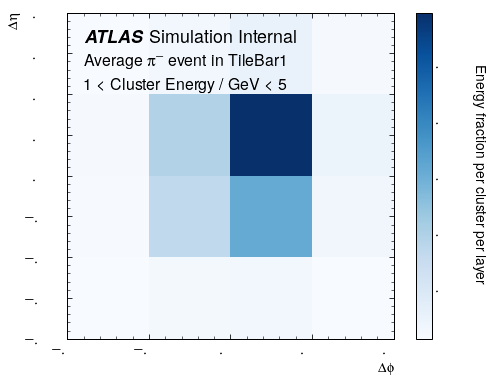

<Figure size 576x432 with 0 Axes>

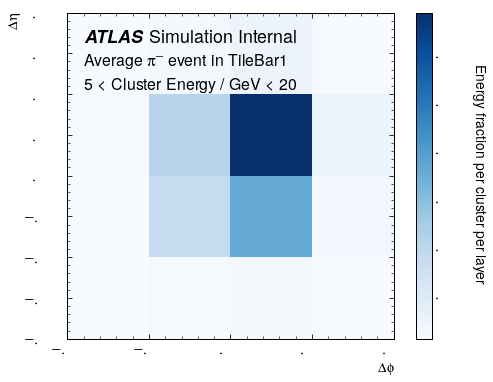

<Figure size 576x432 with 0 Axes>

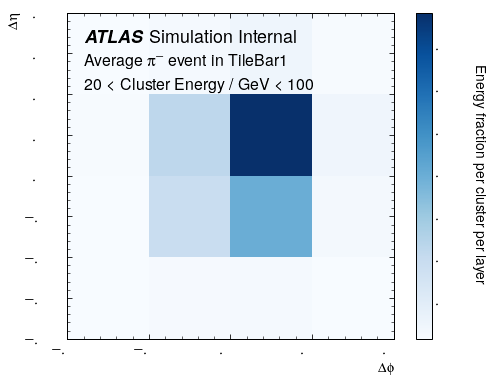

<Figure size 576x432 with 0 Axes>

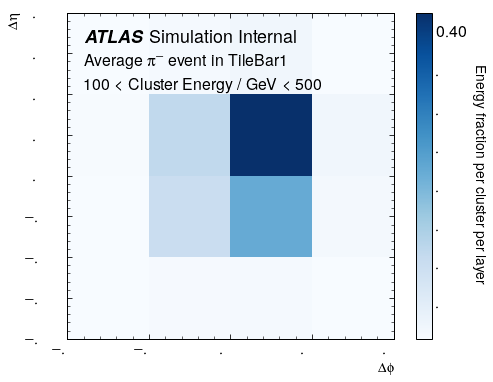

<Figure size 576x432 with 0 Axes>

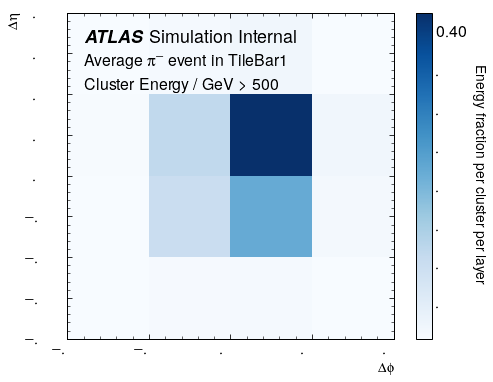

<Figure size 576x432 with 0 Axes>

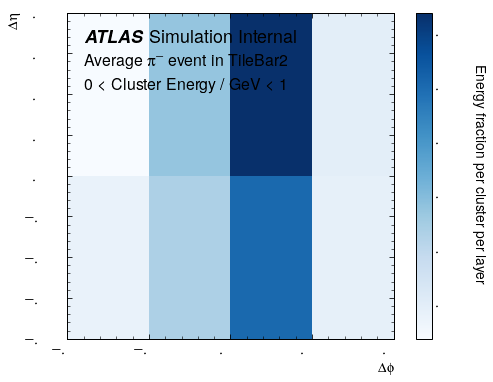

<Figure size 576x432 with 0 Axes>

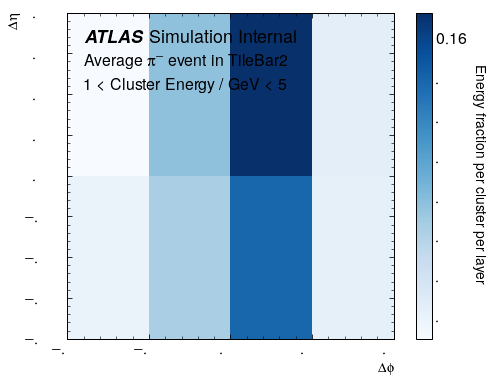

<Figure size 576x432 with 0 Axes>

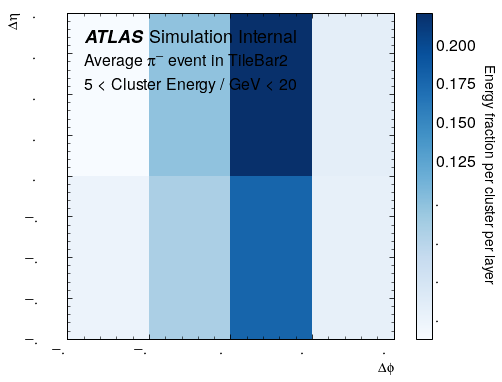

<Figure size 576x432 with 0 Axes>

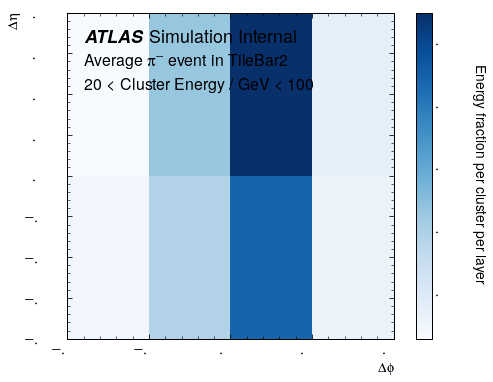

<Figure size 576x432 with 0 Axes>

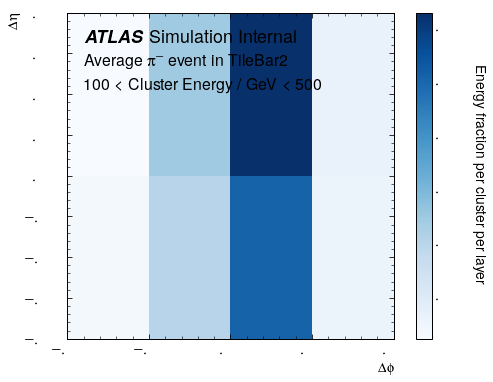

<Figure size 576x432 with 0 Axes>

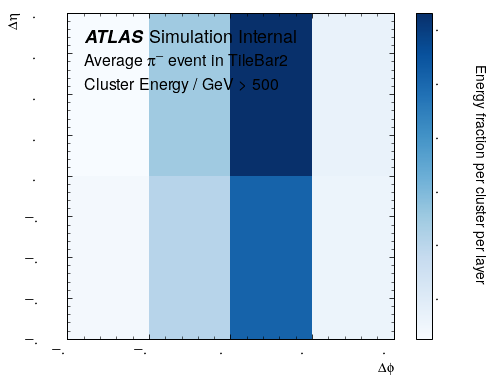

In [13]:
# average pi0/+/- events
#todo: bin in eta
for ptype, pcell in pcells_normed.items():
    layer_average[ptype] = {}
    for layer in layers:
        layer_average[ptype][layer] = []
        for i in range(len(energy_bins)):
            plt.cla(); plt.clf()
            fig = plt.figure()
            fig.patch.set_facecolor('white')
            
            if( i == len(energy_bins)-1 ):
                sel = pdata[ptype]['clusterE'] > energy_bins[i]
                label = 'Cluster Energy / GeV > '+str(energy_bins[i])
            else:        
                sel = (pdata[ptype]['clusterE'] > energy_bins[i]) & (pdata[ptype]['clusterE'] > energy_bins[i+1])
                label = str(energy_bins[i])+' < Cluster Energy / GeV < '+str(energy_bins[i+1])

            layer_average[ptype][layer].append(
                pcell[layer][sel].sum(axis=0).reshape(cell_shapes[layer]) / len(pcell[layer][sel])
            )
            plt.imshow(layer_average[ptype][layer][i], extent=[-0.2, 0.2, -0.2, 0.2],
                    cmap=plt.get_cmap('Blues'), origin='lower', interpolation='nearest')
#             plt.title('Average '+ptype+' event in '+layer+', '+label)
            ampl.set_xlabel("$\Delta\phi$")
            ampl.set_ylabel("$\Delta\eta$")
            ampl.draw_atlas_label(0.05, 0.95, simulation = True, fontsize = 18)
            fig.axes[0].text(-0.18, 0.135, 'Average '+pi_latex[ptype]+' event in '+layer)
            fig.axes[0].text(-0.18, 0.105, label)
            cbar = plt.colorbar()
            cbar.set_label('Energy fraction per cluster per layer', rotation=270, labelpad=20)
            plt.savefig(plotpath+ptype+'_'+layer+'_clusterE'+str(i)+'.pdf')
            plt.show()

<Figure size 576x432 with 0 Axes>

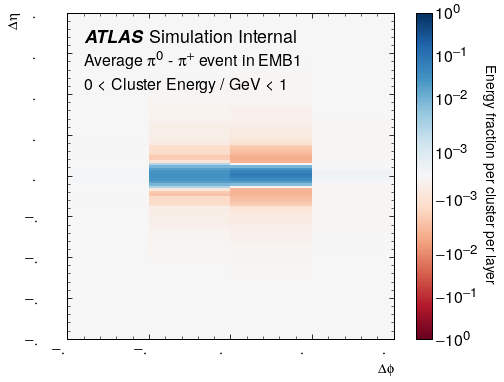

<Figure size 576x432 with 0 Axes>

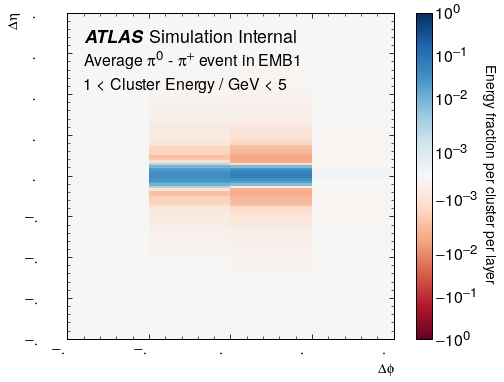

<Figure size 576x432 with 0 Axes>

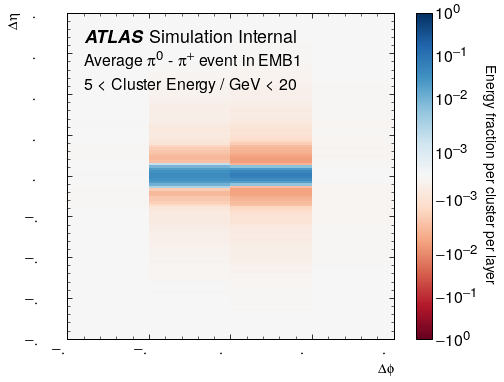

<Figure size 576x432 with 0 Axes>

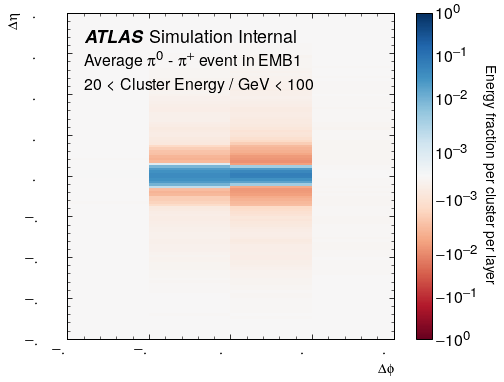

<Figure size 576x432 with 0 Axes>

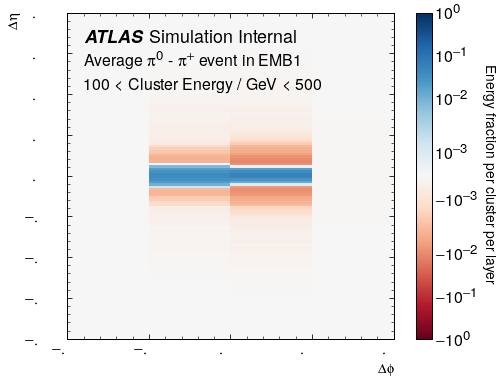

<Figure size 576x432 with 0 Axes>

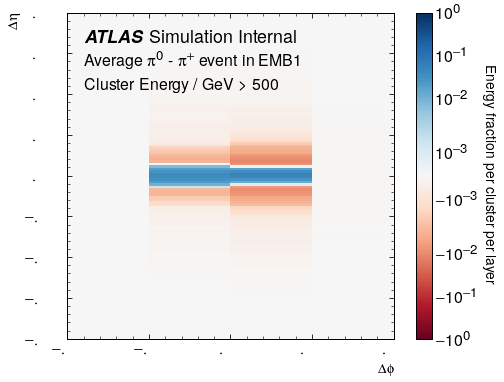

<Figure size 576x432 with 0 Axes>

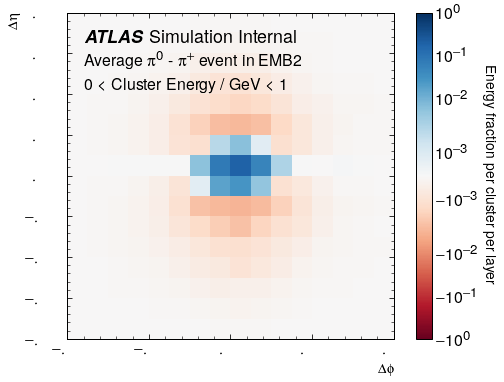

<Figure size 576x432 with 0 Axes>

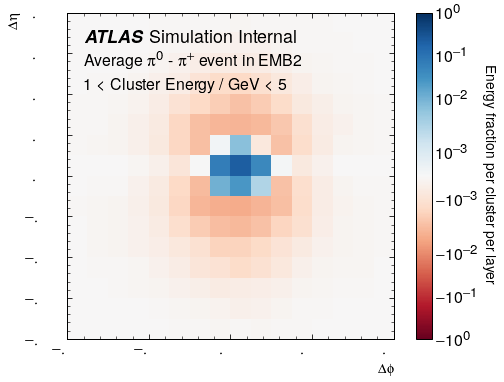

<Figure size 576x432 with 0 Axes>

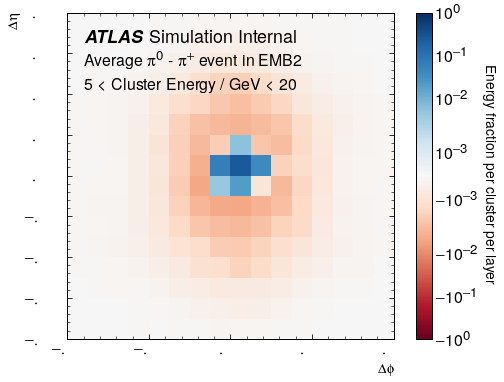

<Figure size 576x432 with 0 Axes>

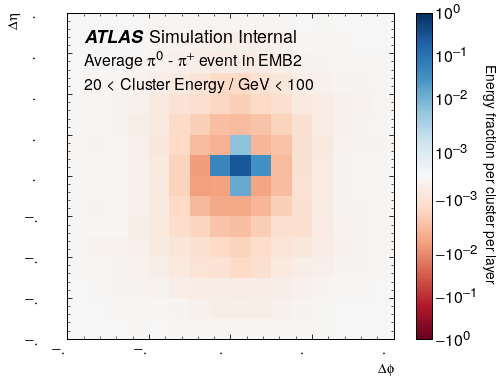

<Figure size 576x432 with 0 Axes>

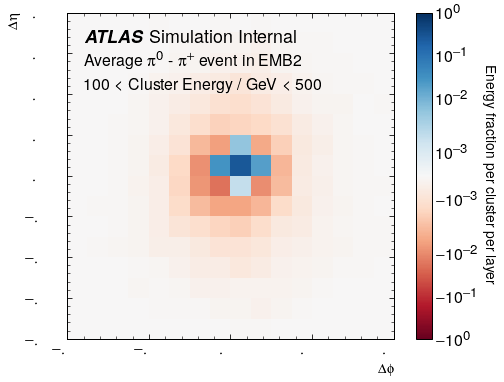

<Figure size 576x432 with 0 Axes>

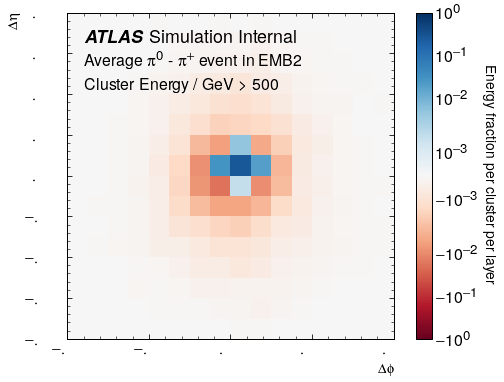

<Figure size 576x432 with 0 Axes>

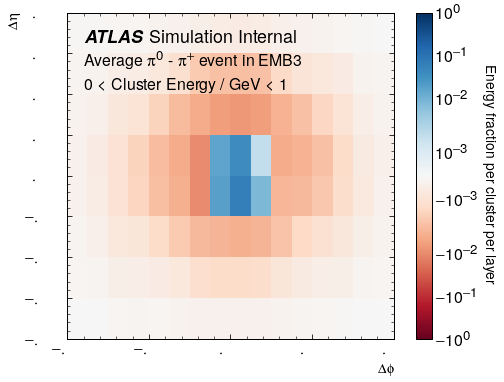

<Figure size 576x432 with 0 Axes>

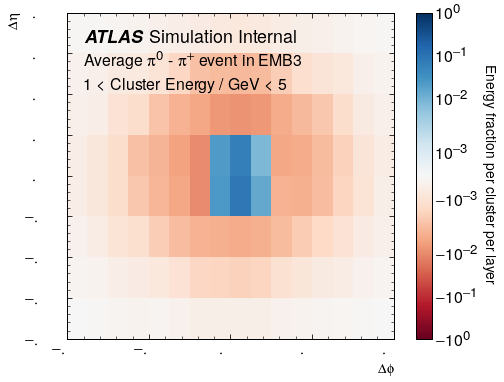

<Figure size 576x432 with 0 Axes>

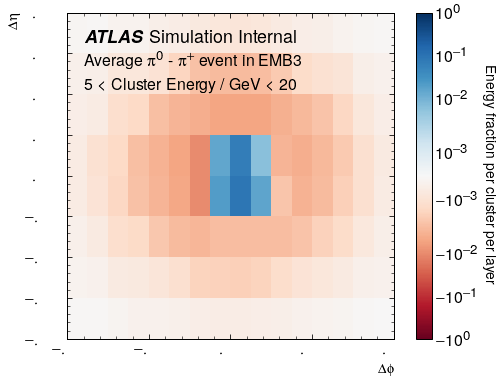

<Figure size 576x432 with 0 Axes>

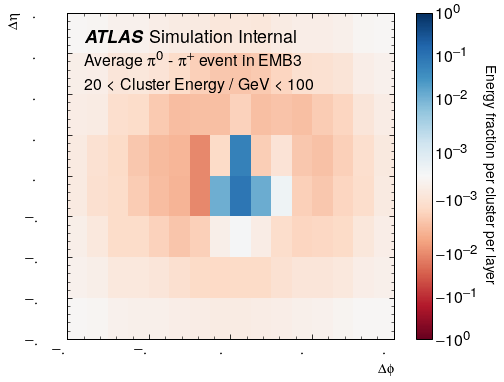

<Figure size 576x432 with 0 Axes>

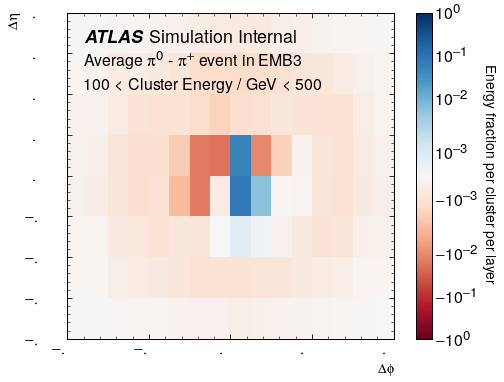

<Figure size 576x432 with 0 Axes>

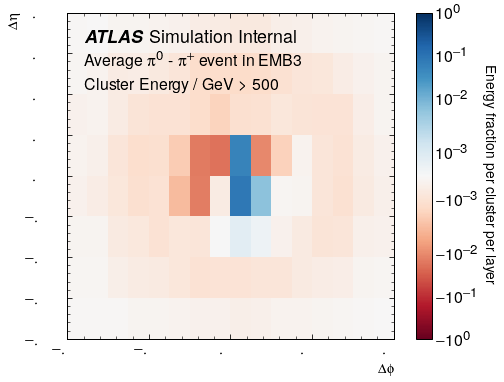

<Figure size 576x432 with 0 Axes>

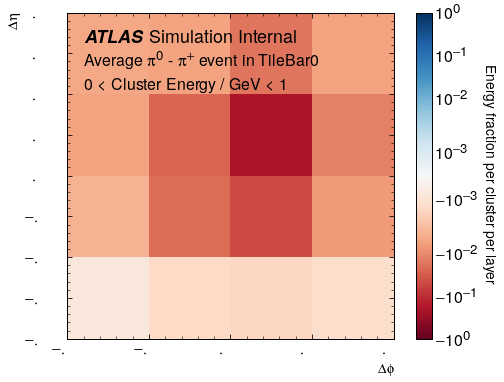

<Figure size 576x432 with 0 Axes>

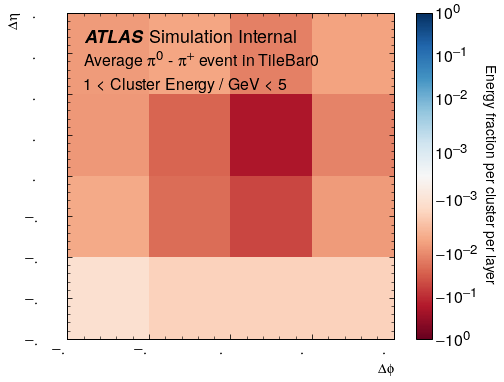

<Figure size 576x432 with 0 Axes>

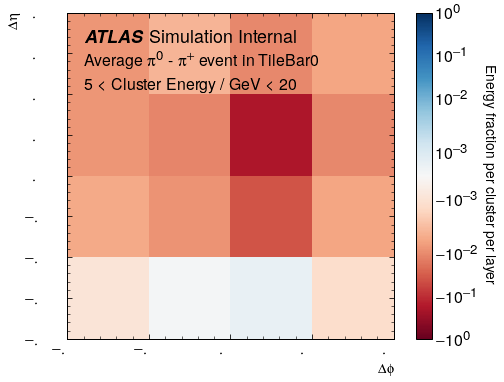

<Figure size 576x432 with 0 Axes>

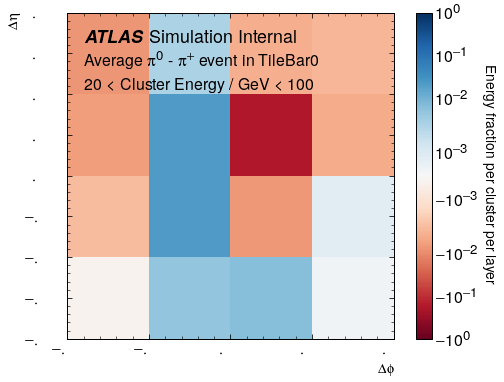

<Figure size 576x432 with 0 Axes>

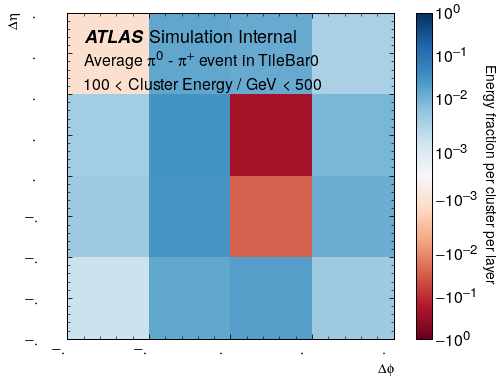

<Figure size 576x432 with 0 Axes>

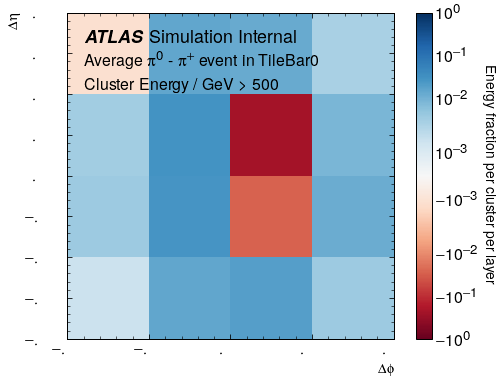

<Figure size 576x432 with 0 Axes>

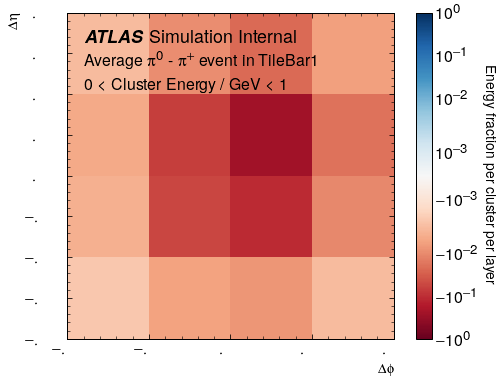

<Figure size 576x432 with 0 Axes>

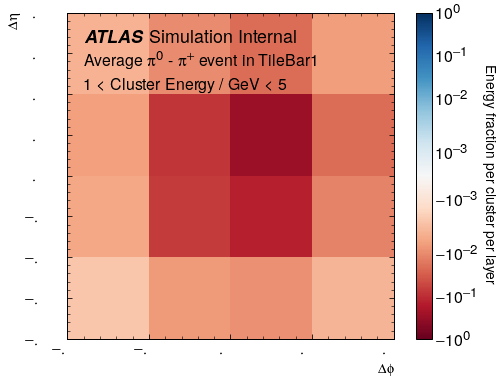

<Figure size 576x432 with 0 Axes>

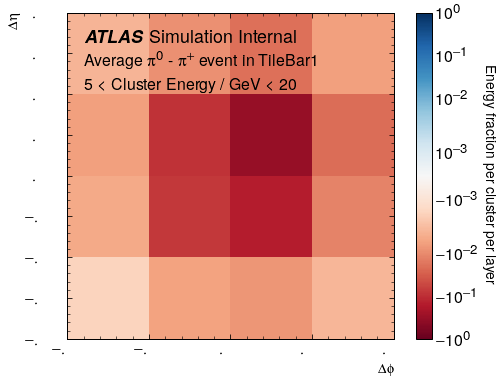

<Figure size 576x432 with 0 Axes>

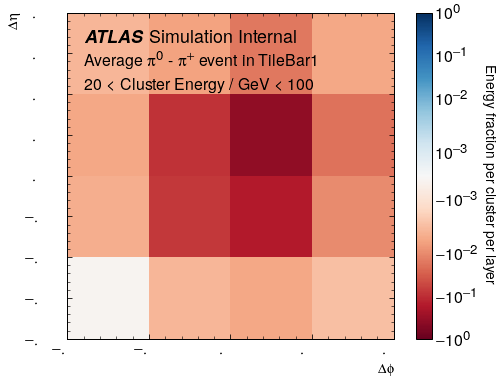

<Figure size 576x432 with 0 Axes>

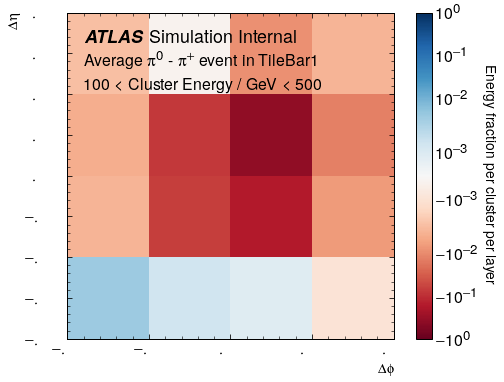

<Figure size 576x432 with 0 Axes>

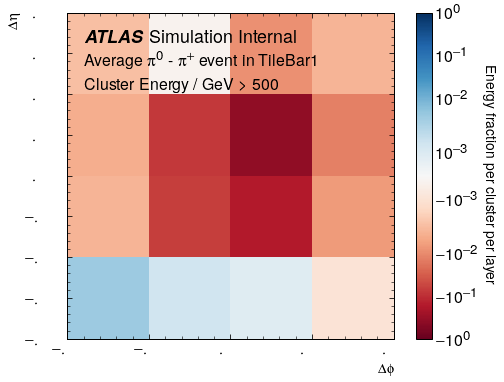

<Figure size 576x432 with 0 Axes>

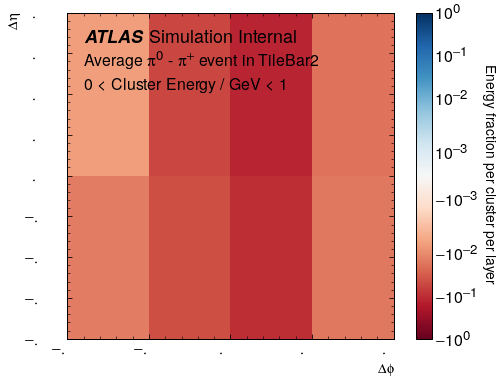

<Figure size 576x432 with 0 Axes>

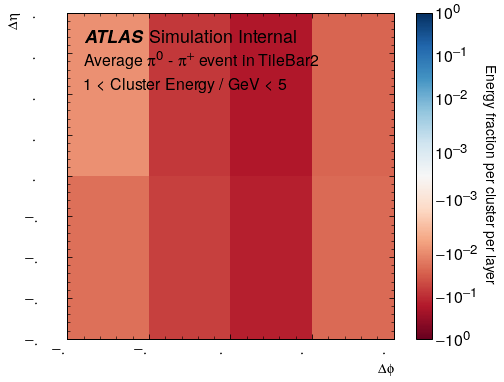

<Figure size 576x432 with 0 Axes>

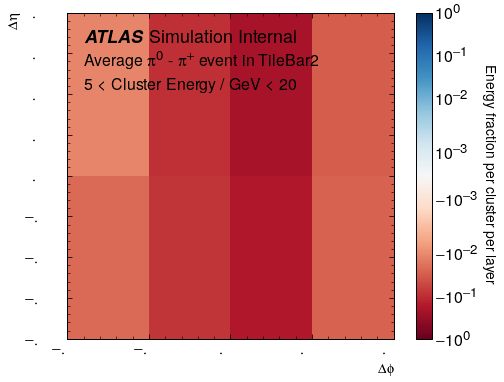

<Figure size 576x432 with 0 Axes>

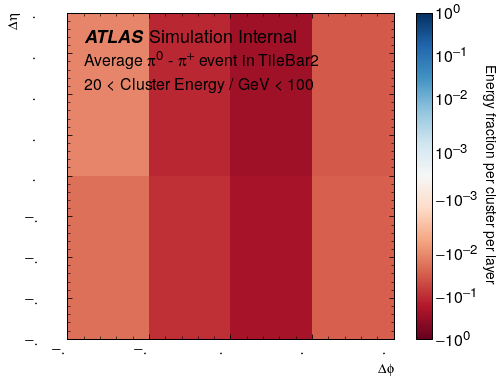

<Figure size 576x432 with 0 Axes>

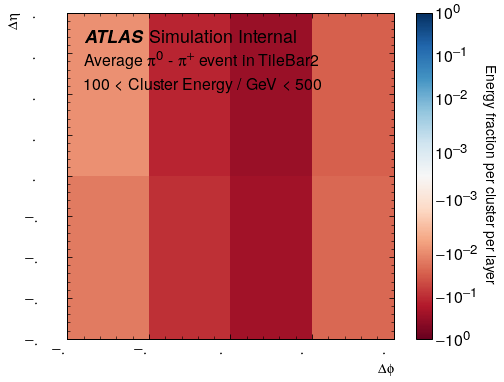

<Figure size 576x432 with 0 Axes>

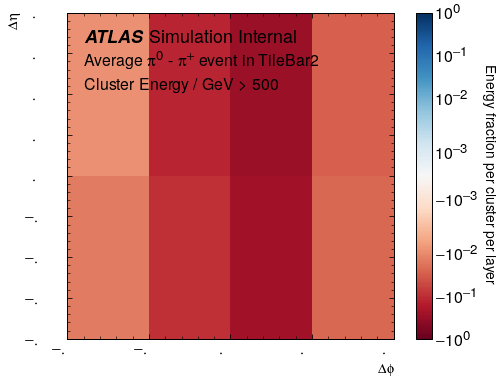

In [14]:
# difference between average pi0 and average pi+

# colourmap generator
def get_cmap(xmin,xmax):
    if(xmin > 0):
        # all positive
        cdict = {
            'red': ((0, 1, 1),
                   (1, 0, 0)),
            'green': ((0, 1, 1),
                      (1, 0, 0)),
            'blue': ((0, 1, 1),
                     (1, 1, 1))
        }
    elif(xmax < 0):
        # all negative
        cdict = {
            'red': ((0, 1, 1),
                    (1, 1, 1)),
            'green': ((0, 0, 0),
                     (1, 1, 1)),
            'blue': ((0, 0, 0),
                     (1, 1, 1))
        }
    else:
        # two-sided
        xrange = xmax - xmin
        white_point = -xmin/xrange
        
        cdict = {
            'red': ((0.0, 1.0, 1.0),
                    (white_point, 1.0, 1.0),
                    (1.0, 0.0, 0.0)),
         
            'green': ((0.0, 0.0, 0.0),
                      (white_point, 1.0, 1.0),
                      (1.0, 0.0, 0.0)),
             
            'blue': ((0.0, 0.0, 0.0),
                     (white_point, 1.0, 1.0),
                     (1.0, 1.0, 1.0)),
        }
    return mpl.colors.LinearSegmentedColormap('rwb', cdict, 1024)

for layer in layers:
    for i in range(len(energy_bins)):
        plt.cla(); plt.clf()
        fig = plt.figure()
        fig.patch.set_facecolor('white')

        if( i == len(energy_bins)-1 ):
            label = 'Cluster Energy / GeV > '+str(energy_bins[i])
        else:
            label = str(energy_bins[i])+' < Cluster Energy / GeV < '+str(energy_bins[i+1])

        average_diff = layer_average['pi0'][layer][i]-layer_average['piplus'][layer][i]
        xmin = np.amin(average_diff)
        xmax = np.amax(average_diff)
        plt.imshow(average_diff,
                   norm=mpl.colors.SymLogNorm(linthresh=0.002, linscale=1,
                       vmin=-1.0, vmax=1.0, base=10),
                   extent=[-0.2, 0.2, -0.2, 0.2],
                   cmap='RdBu', origin='lower',
                   interpolation='nearest')
#         plt.title('Average pi0 - pi+ event in '+layer+', '+label)
        ampl.set_xlabel("$\Delta\phi$")
        ampl.set_ylabel("$\Delta\eta$")
        ampl.draw_atlas_label(0.05, 0.95, simulation = True, fontsize = 18)
        fig.axes[0].text(-0.18, 0.135, 'Average '+pi_latex['pi0']+' - '+pi_latex['piplus']+' event in '+layer)
        fig.axes[0].text(-0.18, 0.105, label)
        cbar = plt.colorbar()
        cbar.set_label('Energy fraction per cluster per layer', rotation=270, labelpad=20)
        plt.savefig(plotpath+'pidiff_'+layer+'_clusterE'+str(i)+'.pdf')
        plt.show()